<a href="https://colab.research.google.com/github/dorothy-in-ds/Airbnb-Superhost-Analysis-/blob/master/Dorothy_baseline_model_replication%26ploting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set-up

In [ ]:
# Mount into drive

from google.colab import drive

drive.mount("/content/drive")

%cd '/content/drive/MyDrive/1-omscs/'

Mounted at /content/drive
/content/drive/MyDrive/1-omscs




**1.   Environment Setup**



In [ ]:
import numpy as np
import csv
import torch
from IPython.display import Image
import pandas as pd
import json

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

2. clone mmf from github don't rerun this section


In [ ]:
#!git clone https://github.com/facebookresearch/mmf.git

3. install mmf

reinstall imgaug before installing mmf

In [ ]:
!pip uninstall imgaug && pip uninstall albumentations && pip install git+https://github.com/aleju/imgaug.git

  Cloning https://github.com/aleju/imgaug.git to /tmp/pip-req-build-ai0etmeb
  Running command git clone -q https://github.com/aleju/imgaug.git /tmp/pip-req-build-ai0etmeb
  Resolved https://github.com/aleju/imgaug.git to commit 0101108d4fed06bc5056c4a03e2bcb0216dac326
     |████████████████████████████████| 38.1 MB 1.5 MB/s 
     |████████████████████████████████| 55.4 MB 1.3 MB/s 
     |████████████████████████████████| 1.1 MB 42.2 MB/s 
     |████████████████████████████████| 3.3 MB 44.8 MB/s 
     |████████████████████████████████| 6.1 MB 41.6 MB/s 
     |████████████████████████████████| 178 kB 50.0 MB/s 
     |████████████████████████████████| 1.9 MB 38.1 MB/s 
  Created wheel for imgaug: filename=imgaug-0.4.0-py3-none-any.whl size=971122 sha256=c4e8a552029c70006c2a73d60a4661b787629e24e8341e7b691617dfd4c7fbcd
  Stored in directory: /tmp/pip-ephem-wheel-cache-trtbh3tg/wheels/0c/78/b5/9303fae9d5e03df1f319adfe4e6534180b5c3232de11bc9a2f
Successfully built imgaug


In [ ]:
cd /content/drive/My Drive/1-omscs/mmf

/content/drive/My Drive/1-omscs/mmf


In [ ]:
!pip install --editable .

4. unzip dataset to drive specified path

instructions: Yes, while extracting pass --mmf_data_folder=<your_dir> option to mmf_convert_hm command. Then, while running the commands, use MMF_DATA_DIR=<your_dir> environment variable to specify where your data dir is to MMF.

In [ ]:
cd /content/drive/My Drive/1-omscs

/content/drive/My Drive/1-omscs


In [ ]:
#unzip the meme dataset 
!mmf_convert_hm --zip_file='/content/drive/My Drive/1-omscs/hm_data1.zip' --password='' --bypass_checksum=1 #--mmf_data_folder='/content/drive/My Drive/1-omscs'

/usr/local/lib/python3.7/dist-packages/omegaconf/resolvers/__init__.py:13: UserWarning: The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573
  "The `env` resolver is deprecated, see https://github.com/omry/omegaconf/issues/573"
/usr/local/lib/python3.7/dist-packages/omegaconf/grammar_visitor.py:257: UserWarning: In the sequence `MMF_LOG_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/omegaconf/grammar_visitor.py:257: UserWarning: In the sequence `MMF_REPORT_DIR,` some elements are missing: please replace them with empty quoted strings. See https://github.com/omry/omegaconf/issues/572 for details.
  category=UserWarning,
/usr/local/lib/python3.7/dist-packages/omegaconf/grammar_visitor.py:257: UserWarning: In the sequence `MMF_TENSORBOARD_LOGDIR,` some elements are missing: please replace them with empty

Explore the dataset

In [ ]:
cd '/content/drive/My Drive/1-omscs/datasets/hateful_memes/defaults/annotations'

/content/drive/My Drive/1-omscs/datasets/hateful_memes/defaults/annotations


In [ ]:
#explore test images
# Opening JSON file
f = open('test_seen.jsonl')
 
# returns JSON object as
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
for i in data:
    print(i)
 
# Closing file
f.close()

In [ ]:
print(f)

<_io.TextIOWrapper name='test_seen.jsonl' mode='r' encoding='UTF-8'>




2.  **Working with pretrained models**


In [ ]:
cd /content/drive/My Drive/1-omscs/mmf

/content/drive/My Drive/1-omscs/mmf


Predict on pretrained mmbt

In [ ]:
!mmf_predict config=projects/hateful_memes/configs/mmbt/defaults.yaml model=mmbt dataset=hateful_memes run_type=test checkpoint.resume_zoo=mmbt.hateful_memes.images training.batch_size=16 MMF_DATA_DIR='/content/drive/My Drive/1-omscs'

understand the final predict file

In [ ]:
pd.read_csv('/content/drive/My Drive/omscs/save/hateful_memes_mmbt_40447481/reports/hateful_memes_run_test_2021-12-06T01:43:19.csv')

,id,proba,label
0,15740,0.147090,0
1,38794,0.991150,1
2,60792,0.009282,0
3,71824,0.000705,0
4,4796,0.567605,1
...,...,...,...
1995,71352,0.001043,0
1996,2164,0.000598,0
1997,3587,0.000565,0
1998,47839,0.384304,0


# run pre-trained visual bert 

In [ ]:
% cd /content/drive/My Drive/1-omscs

/content/drive/My Drive/1-omscs


In [ ]:
!mmf_predict config=projects/hateful_memes/configs/visual_bert/from_coco.yaml \
   model=visual_bert \
   dataset=hateful_memes \
   run_type=val \
   checkpoint.resume_zoo=visual_bert.finetuned.hateful_memes.from_coco 

In [ ]:
pred = pd.read_csv('/content/drive/My Drive/1-omscs/save/hateful_memes_visual_bert_32057151/reports/hateful_memes_run_val_2021-12-09T19:05:49.csv')

In [ ]:
pred

,id,proba,label
0,47056,0.020138,0
1,43805,0.000369,0
2,8291,0.974809,1
3,56098,0.835544,1
4,29437,0.000789,0
...,...,...,...
535,8459,0.000754,0
536,95487,0.000303,0
537,27614,0.001378,0
538,95613,0.990125,1


In [ ]:
labels = pd.read_json(path_or_buf='/content/drive/My Drive/1-omscs/datasets/hateful_memes/defaults/annotations/dev_unseen.jsonl', lines=True)

In [ ]:
df = labels.merge(pred,on='id')

In [ ]:
df

,id,img,label_x,text,proba,label_y
0,76432,img/76432.png,0,you thinking what i'm thinking?,0.000324,0
1,14270,img/14270.png,0,a brilliant mind,0.000953,0
2,56947,img/56947.png,0,"pro gamer 6.000.000 kills, 1 death",0.198037,0
3,35174,img/35174.png,0,lets end poaching,0.105125,0
4,39264,img/39264.png,0,my wife called me a good husband thats a huge ...,0.017685,0
...,...,...,...,...,...,...
535,83675,img/83675.png,0,i'm gonna be like phelps one day,0.001102,0
536,37198,img/37198.png,0,when you're so relaxed you can feel yourself g...,0.000185,0
537,48670,img/48670.png,0,look at this sandwich maker club i found on wi...,0.000447,0
538,9863,img/09863.png,0,diverse group of women,0.000467,0


In [ ]:
!pip install scikit-plot

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import *
from matplotlib import pyplot

In [ ]:
ns_fpr, ns_tpr, _ = roc_curve(df.label_x, df.proba)

Text(0.5, 1.0, 'ROC Curve')

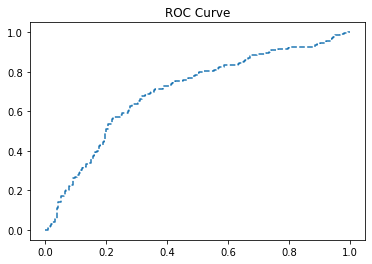

In [ ]:
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='ROC Curve')
pyplot.title('ROC Curve')

In [ ]:
roc_auc_score(df.label_x, df.proba)

0.6996323529411764

In [ ]:
accuracy_score(df.label_x, df.label_y)

0.6703703703703704

In [ ]:
#data_path is the path of your test data set
#predictions is the prediction csv output from mmf predict 
def generate_metrics(data_path,predictions):
  labels = pd.read_json(path_or_buf=data_path, lines=True)
  df = labels.merge(pred,on='id')
  ns_fpr, ns_tpr, _ = roc_curve(df.label_x, df.proba)
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='ROC Curve')
  pyplot.title('ROC Curve')
  print('ROC_AUC score:',roc_auc_score(df.label_x, df.proba))
  print('accuracy:',accuracy_score(df.label_x, df.label_y))
  print('precision:',precision_score(df.label_x, df.label_y))
  print('recall:',recall_score(df.label_x, df.label_y))
  print('log loss:',log_loss(df.label_x, df.proba))

ROC_AUC score: 0.6996323529411764
accuracy: 0.6703703703703704
precision: 0.6037735849056604
recall: 0.32
log loss: 1.474254399395289


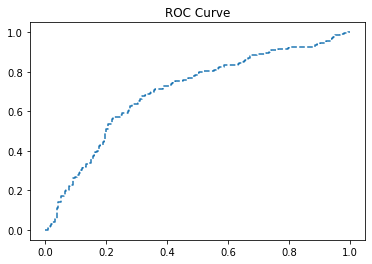

In [ ]:
generate_metrics('/content/drive/My Drive/1-omscs/datasets/hateful_memes/defaults/annotations/dev_unseen.jsonl',pred)

In [ ]:
def training_metrics(data_path,predictions):
  labels = pd.read_json(path_or_buf=data_path, lines=True)
  df = labels.merge(pred,on='id')
  ns_fpr, ns_tpr, _ = roc_curve(df.label_x, df.proba)
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='ROC Curve')
  pyplot.title('ROC Curve')
  print('ROC_AUC score:',roc_auc_score(df.label_x, df.proba))
  print('accuracy:',accuracy_score(df.label_x, df.label_y))
  print('precision:',precision_score(df.label_x, df.label_y))
  print('recall:',recall_score(df.label_x, df.label_y))
  print('log loss:',log_loss(df.label_x, df.proba))